In [17]:
## Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

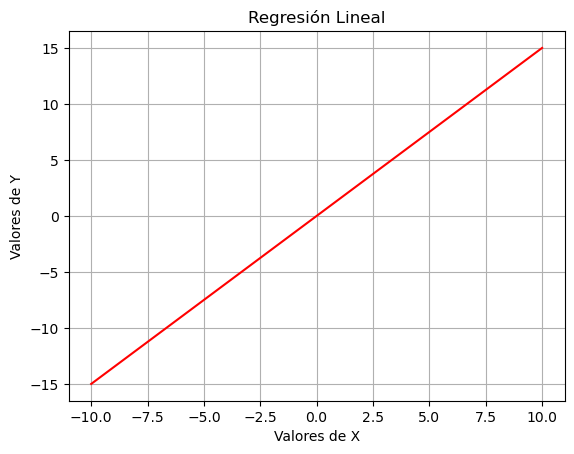

In [10]:
## Regresión Lineal
x = np.linspace(-10,10)
y = 0 + 1.5 * x
plt.plot(x,y, 'r')
plt.title('Regresión Lineal')
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')
plt.grid()
plt.show()

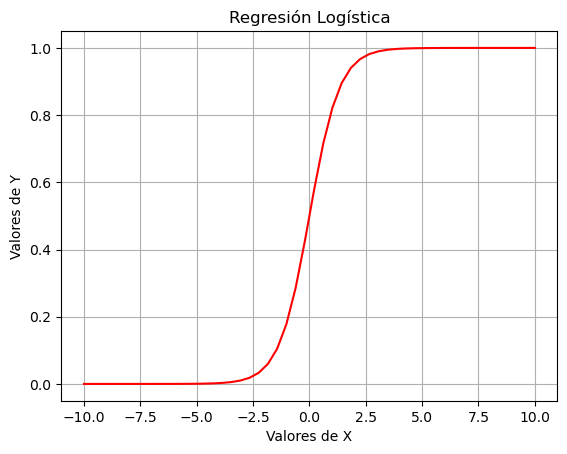

In [9]:
## Regresión Logística
def function(data):
    return 1/(1 + math.e**(-1.5*data))

y1 = function(x)
plt.plot(x, y1, 'r')
plt.title('Regresión Logística')
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')
plt.grid()
plt.show()

In [14]:
df = pd.read_csv('./Datasets/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

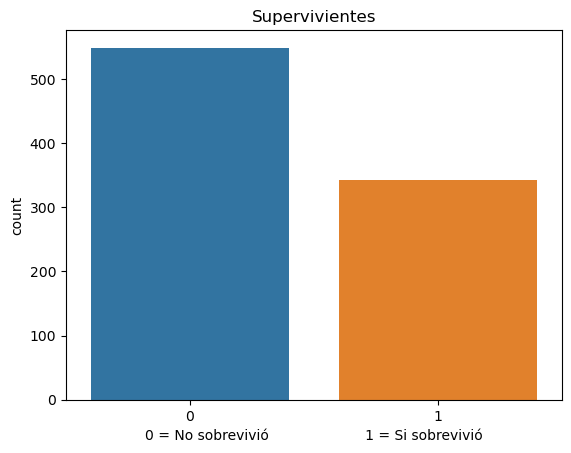

In [23]:
#f, ax = plt.subplot(figsize)
sns.countplot(x = 'Survived', data = df)
plt.title('Supervivientes')
plt.xlabel('0 = No sobrevivió                      1 = Si sobrevivió')
plt.show()

In [24]:
supervivientes = np.sum(df.Survived)
print(supervivientes)

342


In [25]:
noSupervivientes = df.shape[0] - np.sum(df.Survived)
print(noSupervivientes)

549


In [26]:
supervivientes/df.shape[0]

0.3838383838383838

In [27]:
noSupervivientes/df.shape[0]

0.6161616161616161

In [28]:
df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

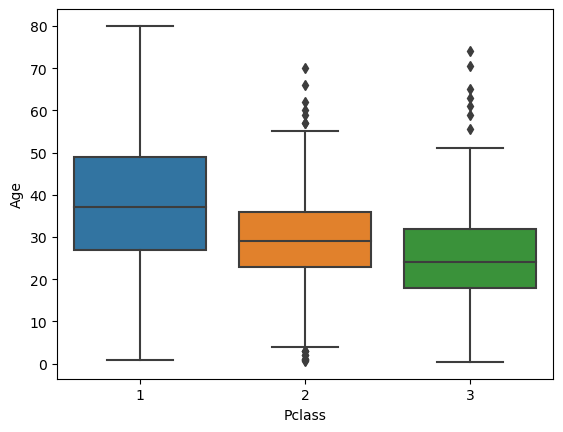

In [29]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df)
plt.show()

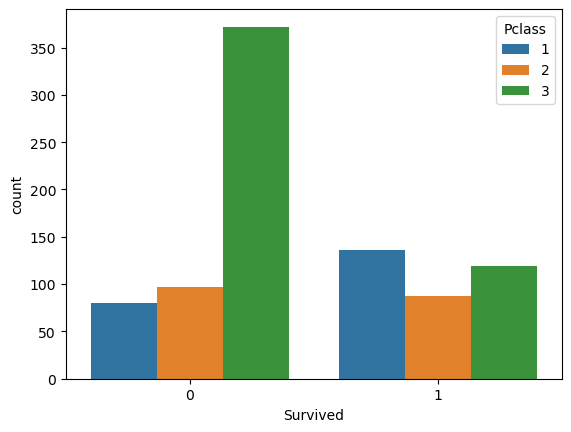

In [30]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)
plt.show()

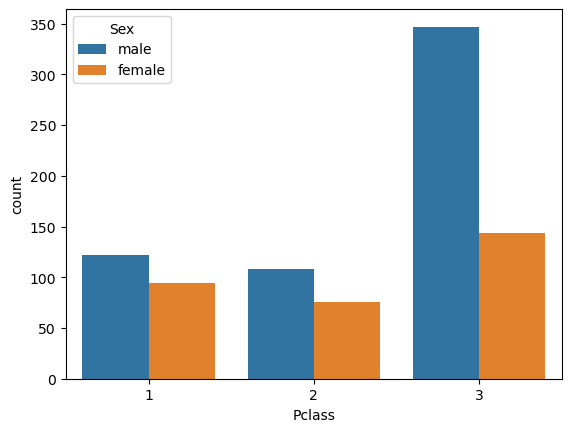

In [31]:
sns.countplot(x = 'Pclass', hue = 'Sex', data = df)
plt.show()

Vamos a eliminar algunas columnas que no son relevantes para realizar nuestro modelo de ML.

Por ejemplo el número de pasajero no tiene sentido dejarlo, no aporta ningún valor a la hora de "predecir" ó "descubrir" porque sobrevivió más un grupo que otro.

El nombre no relevante tampoco.

El número de ticket tampoco.

El número de cabina, tampoco aporta información relevante.

In [32]:
df = df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket', 'Age'], axis = 1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


`Le cambiamos los valores por binarios a la columna de Sex: 0 para "male" y 1 para "female".`

In [33]:
genders = {'male': 0, 'female': 1}

data = [df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [34]:
df['Embarked'].isnull().sum()

2

In [ ]:
common_value = 'S'